In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from env import user, password, host
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

from acquire import df

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

In [3]:
df.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
0,4,2,3633,296425,2005,6941,6037
1,3,4,1620,847770,2011,10244,6037
2,3,2,2077,646760,1926,7924,6037
3,0,0,1200,5328,1972,91,6037
4,0,0,171,6920,1973,255,6037


In [4]:
#Checking to see if the import worked, looks good

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
#Checking the data type

In [7]:
df_drop = df.drop(['year_built','fips','taxamount'],axis =1)

In [8]:
#Cutting unnecessary columns

In [9]:
df = df_drop.astype('int64')

In [10]:
#Changing the type

In [11]:
df.size

8560940

In [12]:
df.shape

(2140235, 4)

In [13]:
#Checking it's size

In [14]:
df.isnull().any()

bedrooms       False
bathrooms      False
square_feet    False
tax_value      False
dtype: bool

In [15]:
#Checking for any null data

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2140235.0,3.301419,0.932600,0.0,3.0,3.0,4.0,25.0
bathrooms,2140235.0,2.186612,0.973504,0.0,2.0,2.0,3.0,32.0
square_feet,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
tax_value,2140235.0,460641.625164,677157.635675,22.0,189166.0,328296.0,534606.0,90188462.0


In [17]:
#Reviewing the stats

In [18]:
df = df[df['tax_value'] != 0]

In [19]:
#Removing anything that has a null value 

In [20]:
df.head()

,bedrooms,bathrooms,square_feet,tax_value
0,4,2,3633,296425
1,3,4,1620,847770
2,3,2,2077,646760
3,0,0,1200,5328
4,0,0,171,6920


In [21]:
df.shape

(2140235, 4)

In [22]:
df['bathrooms'].max()

32

In [23]:
#checking to see what is the highest bathroom count

In [24]:
df_sample = df.head(1000)

In [25]:
#Making a sample so graph creation will speed up

<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

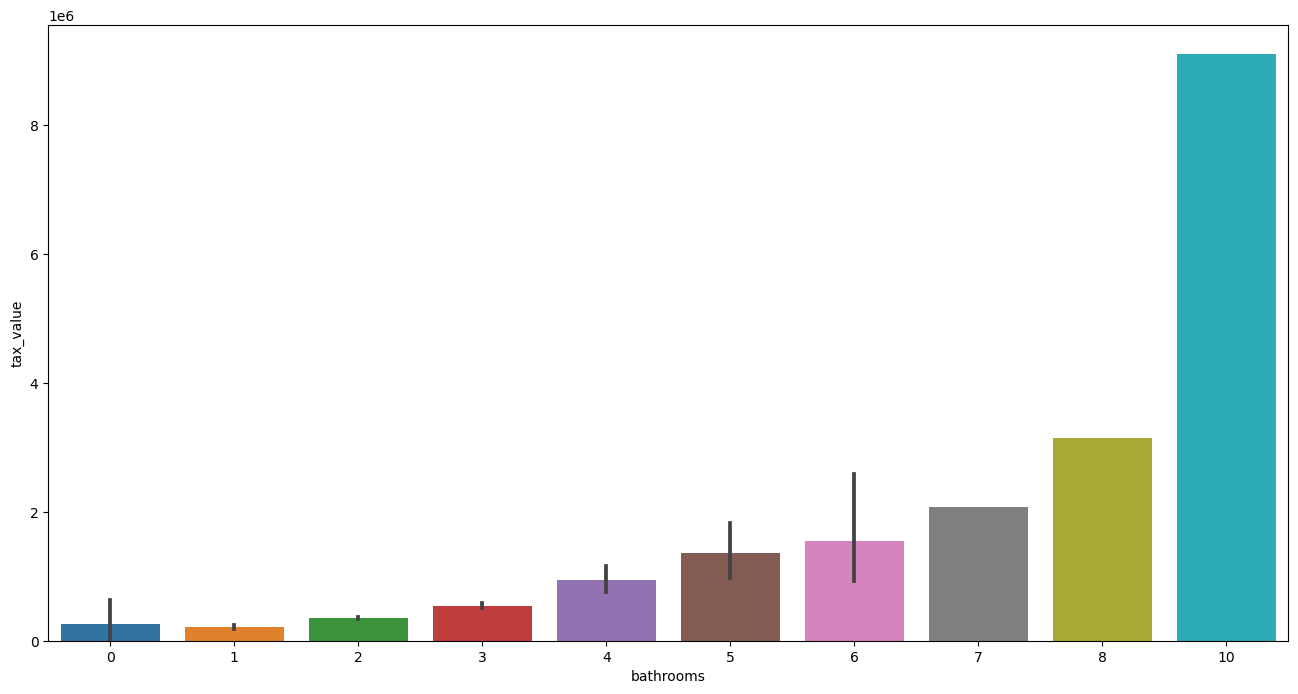

In [103]:
plt.figure(figsize=(16,8))
bathroomtax = sns.barplot(data=df_sample,x='bathrooms',y='tax_value')
bathroomtax 

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

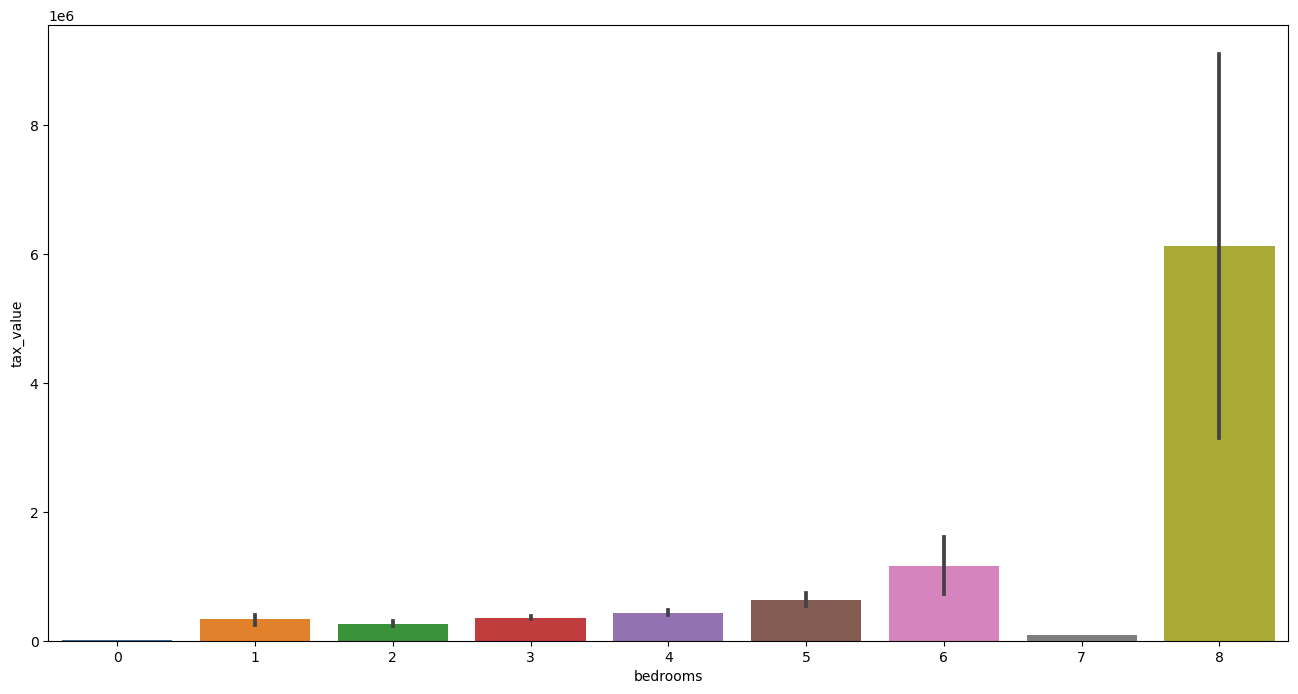

In [27]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_sample,x='bedrooms',y='tax_value')

<AxesSubplot:xlabel='square_feet', ylabel='tax_value'>

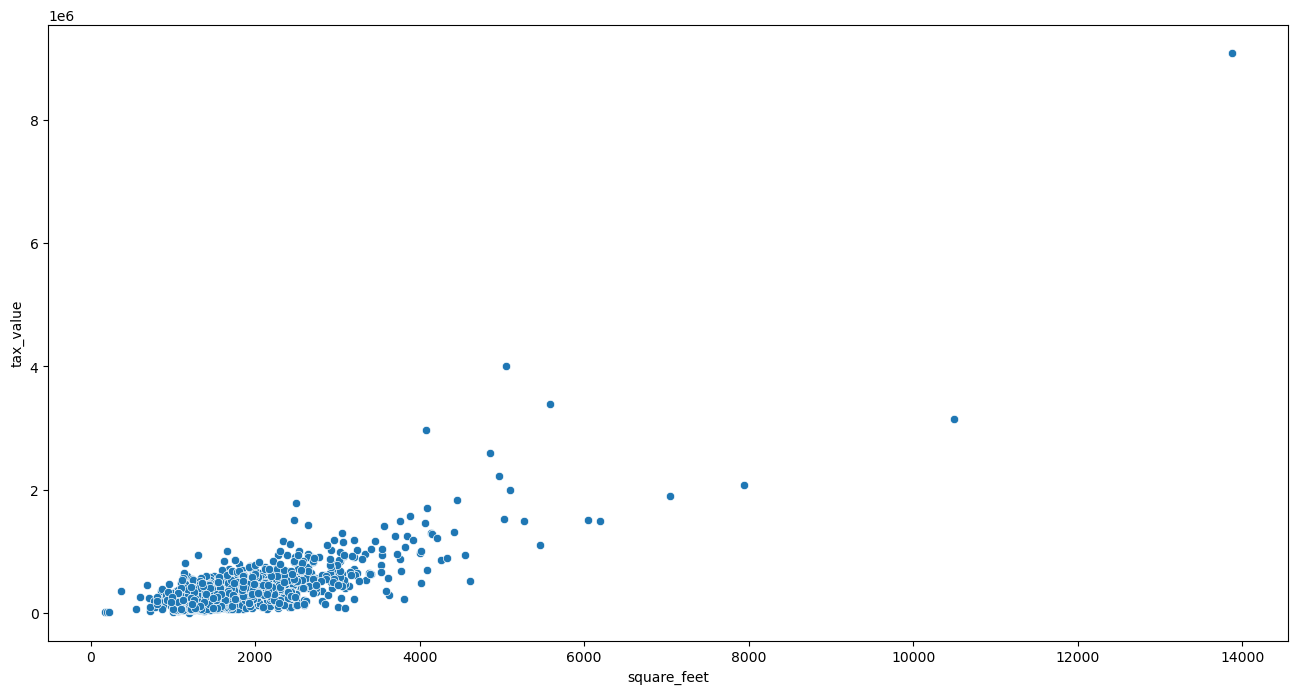

In [28]:
plt.figure(figsize=(16,8))
scattersq = sns.scatterplot(data=df_sample,x='square_feet',y='tax_value')
scattersq

<AxesSubplot:xlabel='square_feet', ylabel='bedrooms'>

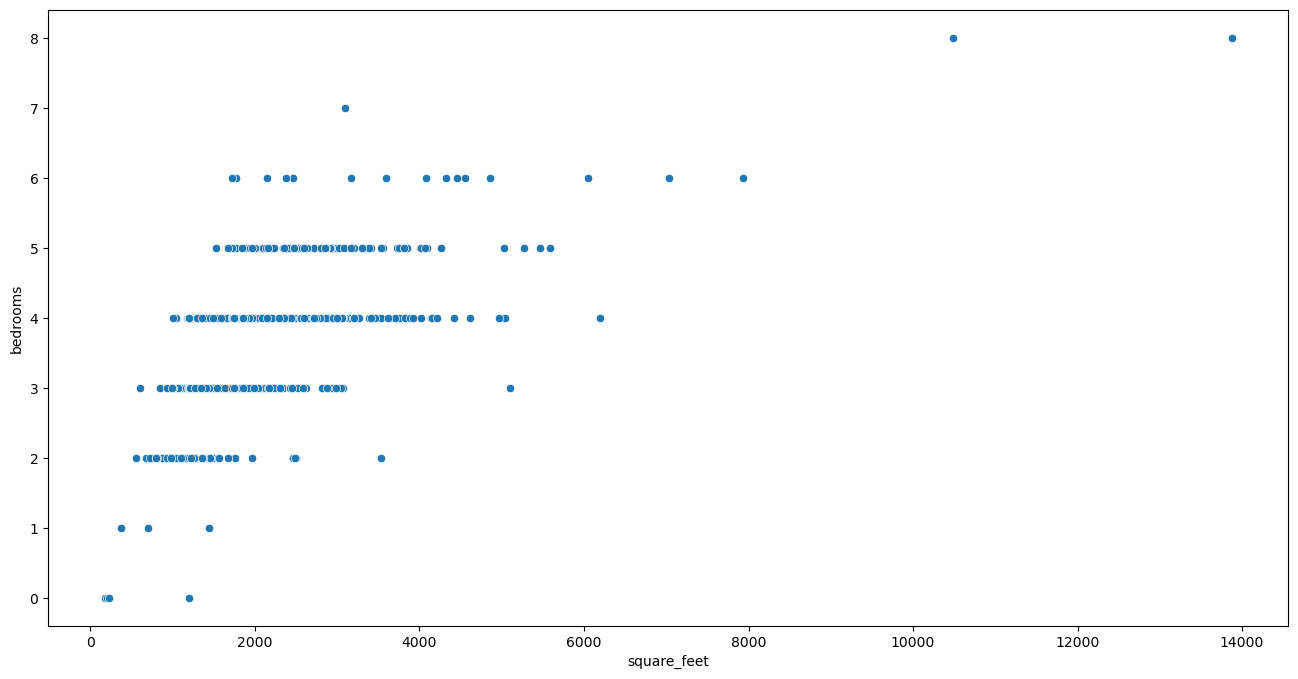

In [29]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_sample,x='square_feet',y='bedrooms')

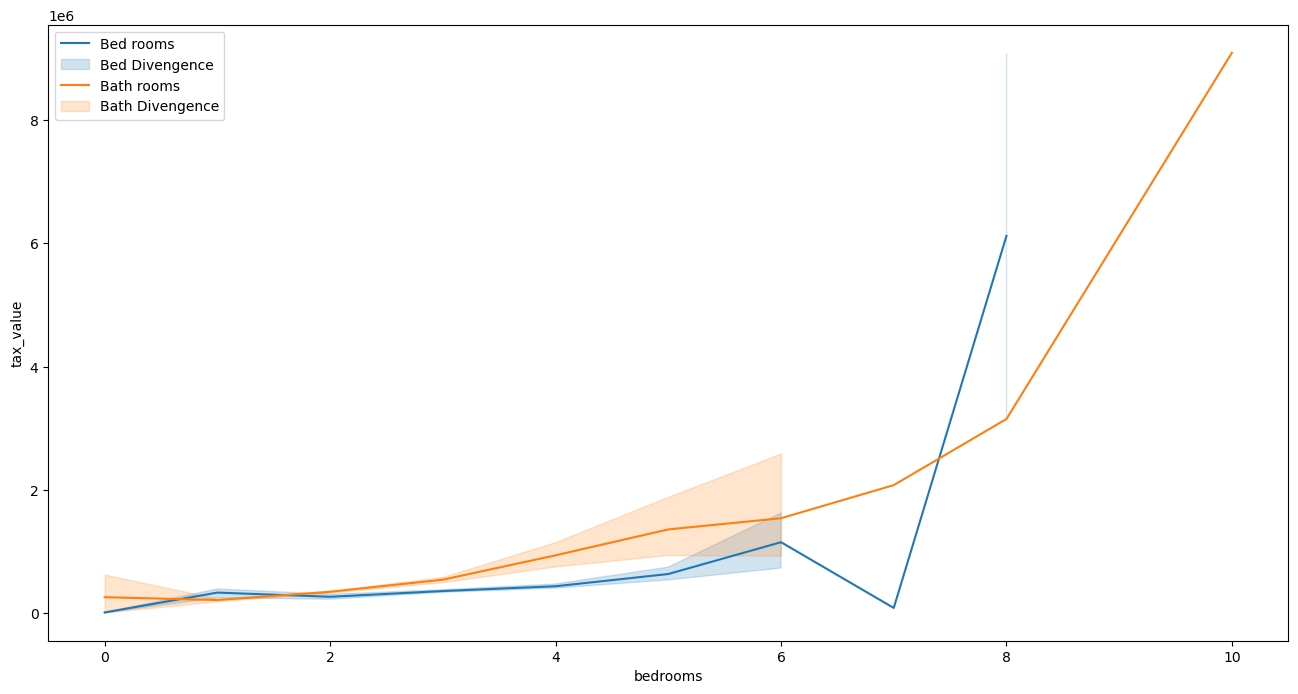

In [30]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_sample,x='bedrooms',y='tax_value')
sns.lineplot(data=df_sample,x='bathrooms',y='tax_value')
plt.legend(labels=["Bed rooms","Bed Divengence","Bath rooms","Bath Divengence"])

In [31]:
#created to find any correlation 

In [32]:
train_val, test = train_test_split(df, train_size=0.7, random_state=1349)
train, validate = train_test_split(train_val, train_size=0.8, random_state=1349)

In [33]:
#making the trains, validates, and tests

In [34]:
train.shape

(1198531, 4)

In [35]:
train_sample = train.head(50)

In [36]:
#making a sample since the data has a lot of entries

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
X_train, y_train = train.drop(columns='tax_value'), \
train[['tax_value']]
X_val, y_val = validate.drop(columns='tax_value'), \
validate[['tax_value']]
X_test, y_test = test.drop(columns='tax_value'), \
test[['tax_value']]

In [39]:
# putting the x,y values in the trains,validates, tests

In [40]:
X_train.head()

,bedrooms,bathrooms,square_feet
558976,3,2,1200
2067324,4,2,1600
412733,3,3,2025
1447575,4,2,1885
84733,4,2,1745


In [41]:
#And now to fit everything together

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [44]:
X_val_scaled = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

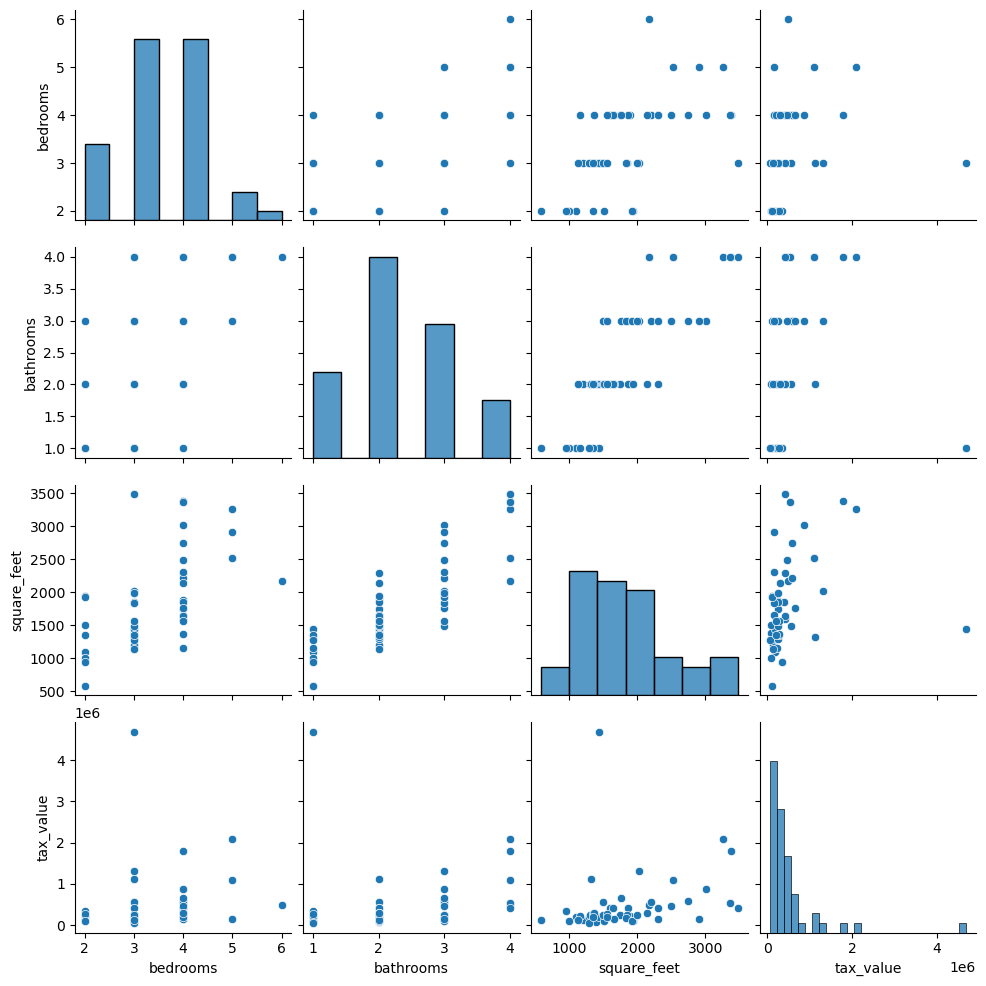

In [45]:
sns.pairplot(train_sample)

In [46]:
#Prepping for Modeling

In [47]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_val)

In [48]:
#make into dataframes

In [49]:
tv_pred_mean = y_train.tax_value.mean()
y_train['tv_pred_mean'] = tv_pred_mean
y_validate['tv_pred_mean'] = tv_pred_mean

In [50]:
#prediction

In [51]:
tv_pred_median = y_train.tax_value.median()
y_train['tv_pred_median'] = tv_pred_median
y_validate['tv_pred_median']  = tv_pred_median

In [52]:
#median

In [53]:
rmse_train_mu = mean_squared_error(y_train.tax_value,
                                y_train.tv_pred_mean) ** .5

rmse_validate_mu = mean_squared_error(y_validate.tax_value, y_validate.tv_pred_mean) ** (0.5)

print(f"""RMSE using Mean
Train/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

RMSE using Mean
Train/In-Sample: 671973.33 
Validate/Out-of-Sample: 646753.68


In [54]:
#rmse of prediction

In [55]:
rmse_train_med = mean_squared_error(y_train.tax_value, y_train.tv_pred_median) ** .5
rmse_validate_med = mean_squared_error(y_validate.tax_value, y_validate.tv_pred_median) ** (0.5)

print(f"""RMSE using Median
Train/In-Sample: {round(rmse_train_med, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")

RMSE using Median
Train/In-Sample: 684839.19 
Validate/Out-of-Sample: 659640.39


In [56]:
#rmse of mean

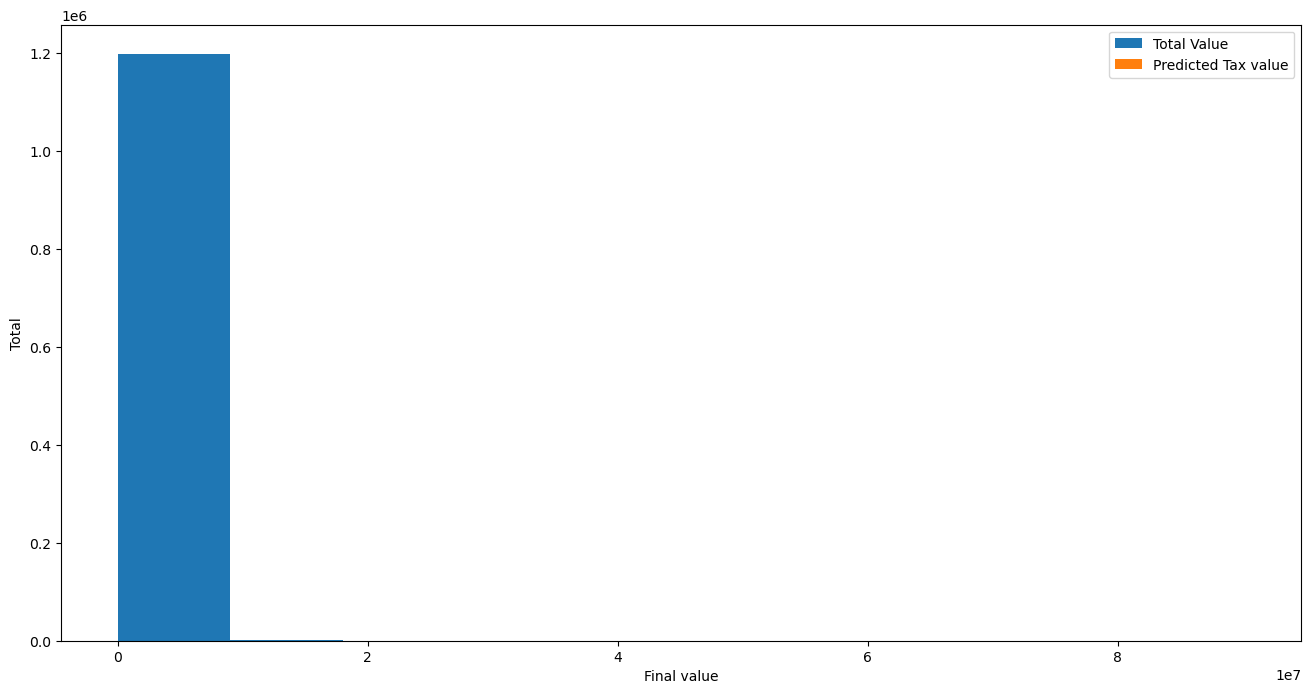

In [57]:
plt.figure(figsize=(16,8))
plt.hist(y_train.tax_value,label="Total Value")
plt.hist(y_train.tv_pred_mean, bins=1,label="Predicted Tax value")
plt.xlabel("Final value")
plt.ylabel("Total")
plt.legend()
plt.show()

In [58]:
# Now to work on Linear regression

In [59]:
lm = LinearRegression()

In [60]:
#Make thing

In [61]:
OLSmodel = lm.fit(X_train, y_train.tax_value)

In [62]:
#Fit thing

In [63]:
y_train['tv_pred_lm'] = lm.predict(X_train)

In [64]:
#use it

In [65]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tv_pred_lm)**(1/2)

In [66]:
#evaluate

In [67]:
y_train.head()

,tax_value,tv_pred_mean,tv_pred_median,tv_pred_lm
558976,130175,460470.264776,328347.0,356665.552497
2067324,419297,460470.264776,328347.0,315865.061348
412733,1305000,460470.264776,328347.0,752416.904438
1447575,226562,460470.264776,328347.0,346800.941870
84733,253763,460470.264776,328347.0,331604.368982


In [68]:
metric_df = pd.DataFrame(data=[
    {'model': 'mean_baseline',
     'RMSE_train': rmse_train_mu,
     'RMSE_validate': rmse_validate_mu,
     'R2_validate': explained_variance_score(y_validate.tax_value,
                                             y_validate.tv_pred_mean)
    }
]
)

In [69]:
#append to metric_df

In [70]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,671973.333666,646753.682425,0.0


In [71]:
#Finding the Lassolars

In [72]:
lars = LassoLars(alpha=0.01)

In [73]:
#make

In [74]:
lars.fit(X_train, y_train.tax_value)

LassoLars(alpha=0.01)

In [75]:
#fit

In [76]:
y_train['tv_pred_lars'] = lars.predict(X_train)

In [77]:
#use

In [78]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tv_pred_lars) ** (1/2)

In [79]:
#eval

In [80]:
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value) ** (1/2)

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 567373.4941983307, 
Validation/Out-of-Sample:  0.0
Difference:  -567373.4941983307


In [81]:
lars.coef_

array([-8.41861712e+04,  3.06174508e+05,  1.08539941e+02])

In [82]:
lars.intercept_

-133373.44845047774

In [83]:
metric_df = metric_df.append(
    {'model': 'lasso_alpha0.01',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_validate.tax_value,
                                             y_validate.tax_value)
    }, ignore_index=True)

In [84]:
#Now to work on tweeding

In [85]:
glm = TweedieRegressor(power=1, alpha=0)

In [86]:
#make

In [87]:
glm.fit(X_train, y_train.tax_value)

TweedieRegressor(alpha=0, power=1)

In [88]:
#fit

In [89]:
y_train['tv_pred_glm'] = glm.predict(X_train)

In [90]:
#use

In [91]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tv_pred_glm) ** (1/2)

In [92]:
#eval

In [93]:
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value) ** (1/2)\

print(f"""RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: 671973.3336661296, 
Validation/Out-of-Sample:  0.0
Difference:  -671973.3336661296


In [94]:
#predict

In [95]:
metric_df = metric_df.append({
    'model': 'glm_normal', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    'R2_validate':explained_variance_score(y_validate.tax_value,
                                           y_validate.tax_value)
    }, ignore_index=True)

In [96]:
#eval

In [97]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,671973.333666,646753.682425,0.0
1,lasso_alpha0.01,567373.494198,0.000000,1.0
2,glm_normal,671973.333666,0.000000,1.0


In [98]:
#append

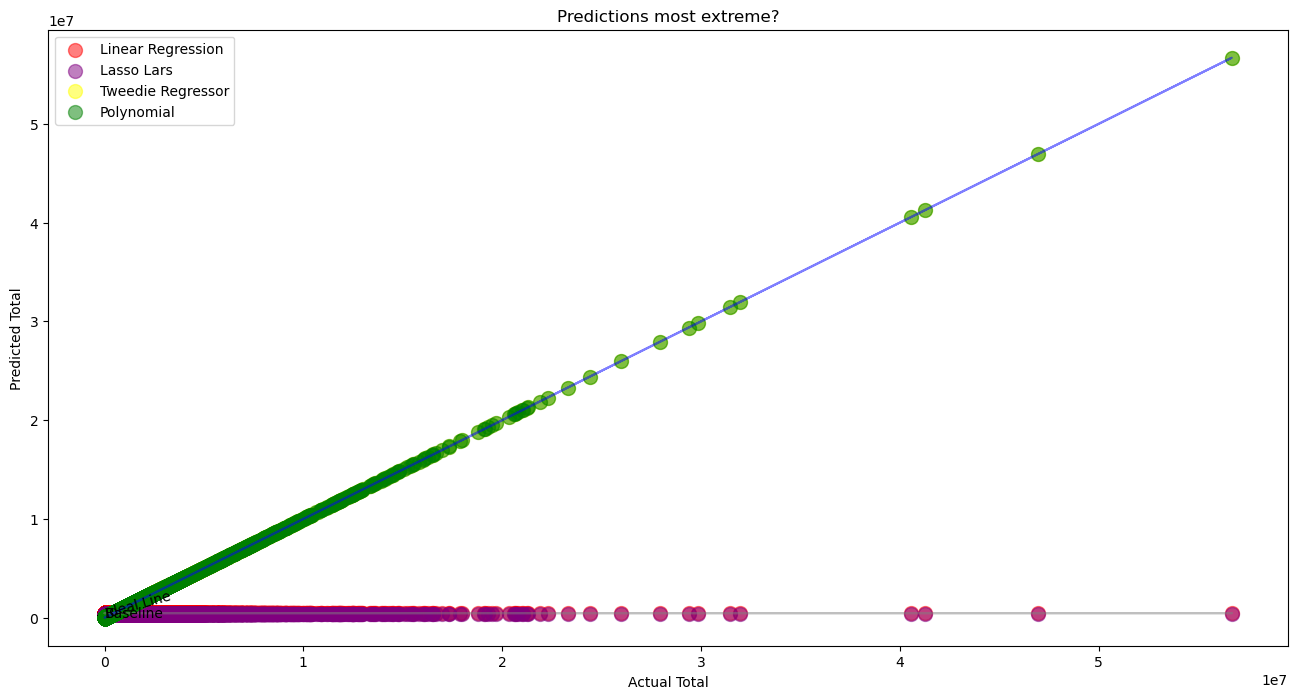

In [100]:
plt.figure(figsize=(16,8))

plt.plot(y_validate.tax_value, y_validate.tv_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline", (16, 9.5))

plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("Ideal Line", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tv_pred_mean, 
            alpha=.5, color="red", s=100, label="Linear Regression")

plt.scatter(y_validate.tax_value, y_validate.tv_pred_median, 
            alpha=.5, color="purple", s=100, label="Lasso Lars")

plt.scatter(y_validate.tax_value, y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Tweedie Regressor")

plt.scatter(y_validate.tax_value, y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Polynomial")
plt.legend()
plt.xlabel("Actual Total")
plt.ylabel("Predicted Total")
plt.title("Predictions most extreme?")
plt.show()

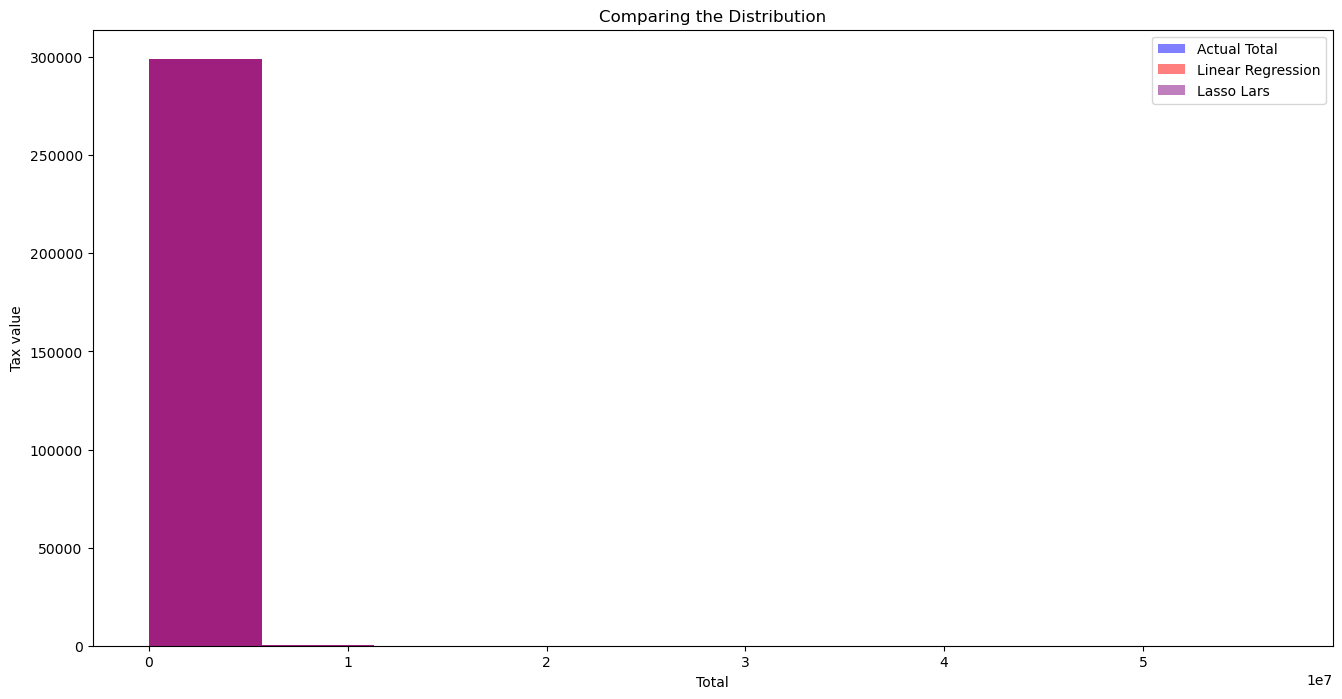

In [101]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Total")
plt.hist(y_validate.tax_value, color='red', alpha=.5, label="Linear Regression")
plt.hist(y_validate.tax_value, color='purple', alpha=.5, label="Lasso Lars")

plt.xlabel("Total")
plt.ylabel("Tax value")
plt.title("Comparing the Distribution")
plt.legend()
plt.show()

In [102]:
y_validate

,tax_value,tv_pred_mean,tv_pred_median
255882,956201,460470.264776,328347.0
563448,370732,460470.264776,328347.0
2094098,82791,460470.264776,328347.0
947294,312529,460470.264776,328347.0
1741202,301266,460470.264776,328347.0
...,...,...,...
1424015,348651,460470.264776,328347.0
1579005,561725,460470.264776,328347.0
992846,318311,460470.264776,328347.0
1712369,764559,460470.264776,328347.0
